In [1]:
import minerva_ann_datasets

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [36]:
def decode_eventid(eventid):
    """
    assume encoding from fuel_up_nukecc.py, make_hdf5_fuelfiles.py, etc.
    """
    eventid = str(eventid)
    phys_evt = eventid[-2:]
    eventid = eventid[:-2]
    gate = eventid[-4:]
    eventid = eventid[:-4]
    subrun = eventid[-4:]
    eventid = eventid[:-4]
    run = eventid
    return (run, subrun, gate, phys_evt)

In [43]:
# choose a bigger tslice for more events to display
tslice = (0, 1)
train_set = minerva_ann_datasets.load_datasubset('../minosmatch_127x66_xuv_padded_me1Bmc_0000.hdf5', 'train', tslice)

In [44]:
train_set.num_examples

1

In [45]:
_, train_dstream = minerva_ann_datasets.make_scheme_and_stream(train_set, 1, shuffle=False)

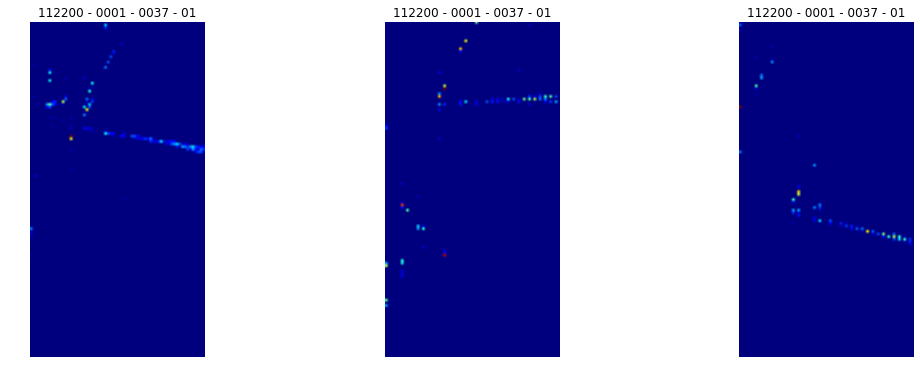

In [46]:
for data in train_dstream.get_epoch_iterator():
    eventid, inputu, inputv, inputx, targets = data[0], data[1], data[2], data[3], data[5]
    run, subrun, gate, phys_evt = decode_eventid(eventid[0])
    fig = plt.figure(figsize=(18, 6))
    gs = plt.GridSpec(1, 3)
    for i, imgdata in enumerate([inputx, inputu, inputv]):
        ax = plt.subplot(gs[i])
        ax.axis('off')
        ax.imshow(imgdata[0][0])
        plt.title('{} - {} - {} - {}'.format(run, subrun, gate, phys_evt))